<a href="https://colab.research.google.com/github/AlexTran448/BiologyNotebooks/blob/main/concentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 1

| Equation | Rate of formulation of X | rate of formulation of Y |
| -------- | -------- | -------- |
| $$\emptyset \xrightarrow{k_1} X$$ | $$\frac{d[X]}{dt}=k_1$$ | $$0$$ |
| $$X \xrightarrow{k_2} Y$$ |  $$\frac{d[X]}{dt}=-k_2[X]$$ |  $$\frac{d[X]}{dt}=k_1$$ |
| $$2X + Y \xrightarrow{k_3} 3X$$ |  $$\frac{d[X]}{dt}=k_3[X]^2[Y]$$ |  $$-k_3[X]^2[Y]$$ |
| $$X \xrightarrow{k_4} \emptyset$$|  $$\frac{d[X]}{dt}=-k_4$$ |  $$0$$




Formulation of X is given by:
$$ \frac{d[X]}{dt} = k_1 - k_2[X] + k_3[X]^2[Y] - k_4[X] $$


Formulation of Y is given by:
$$ \frac{d[Y]}{dt} = k_2[X] - k_3[X]^2[Y]  $$

Substituting values:
$$
k_1 = 1
$$
$$
k_2 = 2
$$
$$
k_3 = 0.02
$$
$$
k4 = 0.04
$$




Formulation of X is given by:
$$ \frac{d[X]}{dt} = 1 - 2[X] + 0.02[X]^2[Y] - 0.04[X] $$


Formulation of Y is given by:
$$ \frac{d[Y]}{dt} = 0.02[X] - 0.04[X]^2[Y]  $$

### Part 2

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def dx_dy_dt(xy,t):
  x,y = xy
  dx_dt = 1 - 2 * x + 0.02 * (x**2) * y - 0.04 * x
  dy_dt = 2 * x - 0.02 * (x**2) * y
  return [dx_dt, dy_dt]

t = range(500)
curve = odeint(dx_dy_dt, [0,0], t)

X = curve[:, 0]
Y = curve[:, 1]

Plotting curves

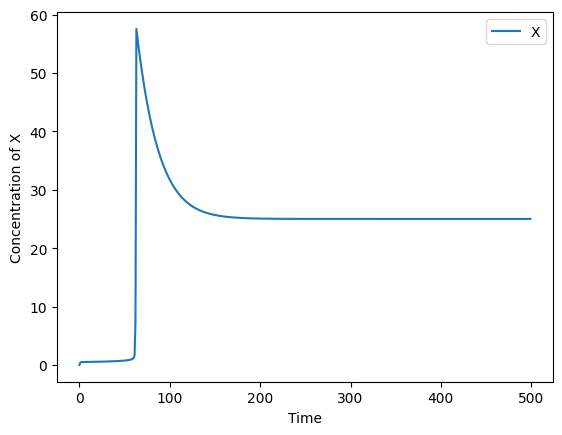

In [ ]:
plt.plot(t,X, label='X')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration of X')
plt.show()

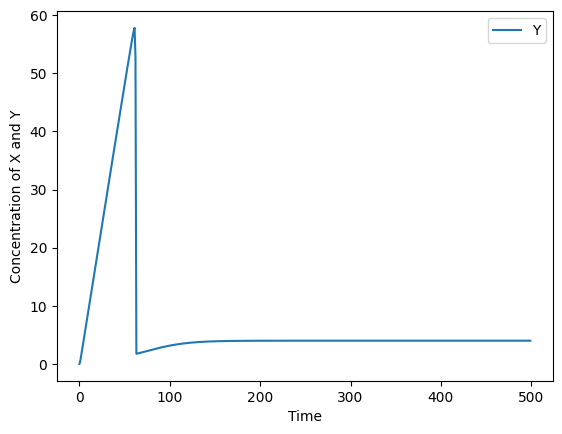

In [ ]:
plt.plot(t,Y, label='Y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration of X and Y')
plt.show()

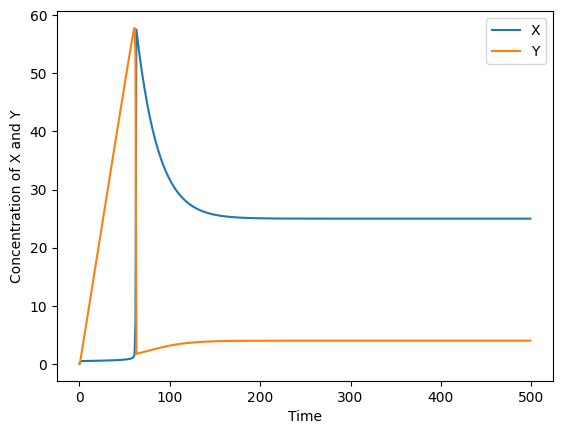

In [ ]:
plt.plot(t,X, label='X')
plt.plot(t,Y, label='Y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration of X and Y')
plt.show()

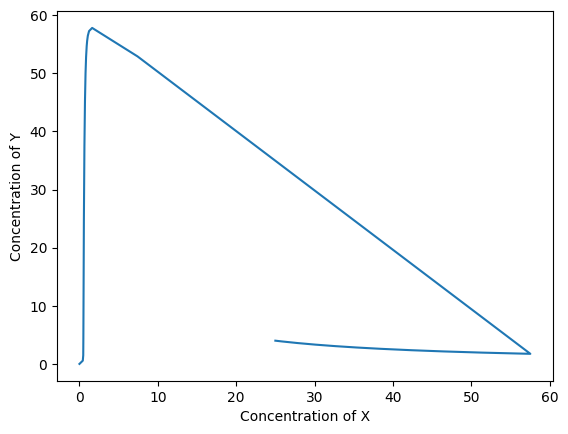

In [ ]:
plt.plot(X,Y)
plt.xlabel('Concentration of X')
plt.ylabel('Concentration of Y')
plt.show()

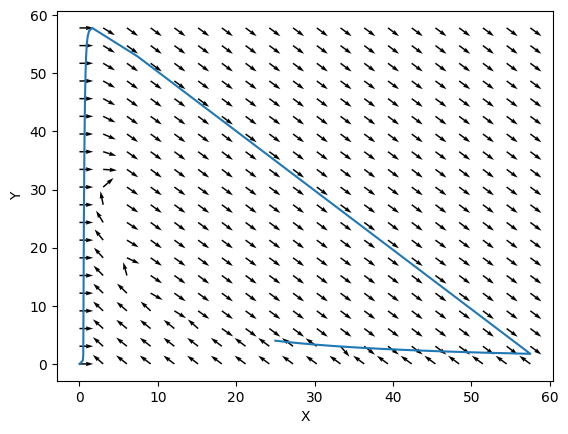

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_direction_field(c, x_values, y_values):
    grid_x, grid_y = np.meshgrid(np.linspace(min(x_values), max(x_values), 20), np.linspace(min(y_values), max(y_values), 20))
    x_derivatives, y_derivatives = np.zeros(grid_x.shape), np.zeros(grid_y.shape)

    for i in range(grid_x.shape[0]):
        for j in range(grid_x.shape[1]):
            x_derivatives[i, j], y_derivatives[i, j] = c([grid_x[i, j], grid_y[i, j]], t=0)

    x_derivatives, y_derivatives = x_derivatives/np.sqrt(x_derivatives**2 + y_derivatives**2), y_derivatives/np.sqrt(x_derivatives**2 + y_derivatives**2)

    plt.quiver(grid_x, grid_y, x_derivatives, y_derivatives, angles="xy")
    plt.plot(x_values, y_values)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

plot_direction_field(dx_dy_dt, X, Y)

The concentration of Y rapidly increases to 60, but then the concentration of X becomes 60 and Y becomes small.
The concentration of X decreases but the concentration of Y only increases slightly, reaching a stable state towards the end.

### Part 3

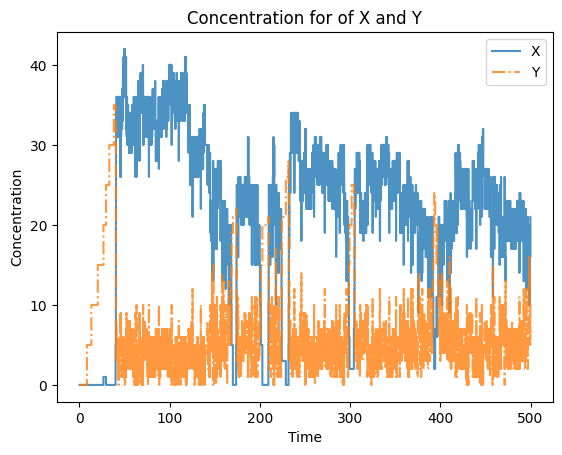

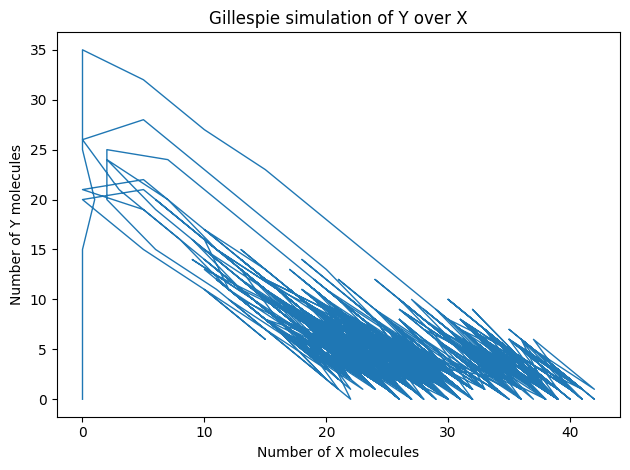

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define Gillespie algorithm
def gillespie_simulation():
    num_X = num_Y = 0
    time = 0
    time_record = [time]
    X_record = [num_X]
    Y_record = [num_Y]

    # simulate 500 times
    while time < 500:
        rates = [1, 2 * num_X, 0.02 * num_X**2 * num_Y, 0.04 * num_X]
        total_rate = sum(rates)

        tau = -np.log(random.random()) / total_rate
        time += tau

        reaction = np.random.choice(range(4), p=[rate/total_rate for rate in rates])
        if reaction == 0:
            # ∅ → X
            num_X += 1
        elif reaction == 1:
            # X → Y
            num_X -= 1
            num_Y += 1
        elif reaction == 2:
            # 2X + Y → 3X
            num_X += 1
            num_Y -= 1
        else:
            # X → ∅
            num_X -= 1

        if abs(num_X - X_record[-1]) >= 5 or abs(num_Y - Y_record[-1]) >= 5:
            time_record.append(time)
            X_record.append(num_X)
            Y_record.append(num_Y)

    return time_record, X_record, Y_record

t, X, Y = gillespie_simulation()

# Plot numbers of X and Y in different colours on the same graph and label them
plt.step(t, X, label='X', where='post', alpha=0.8)
plt.step(t, Y, label='Y', where='post', linestyle='dashdot', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration for of X and Y')
plt.legend()
plt.show()

# Plot numbers of [X] vs [Y]
plt.plot(X, Y, linewidth=1)
plt.xlabel('Number of X molecules')
plt.ylabel('Number of Y molecules')
plt.title('Gillespie simulation of Y over X')

plt.tight_layout()
plt.show()

The results of Gillespe simulation is far more sporadic than the model for the ode.
The randomness causes random gips, however it very roughly still follows the general direction of the ode model.

In [ ]:
!jupyter nbconvert --to html '/content/Untitled8.ipynb'

[NbConvertApp] Converting notebook /content/Untitled8.ipynb to html
[NbConvertApp] Writing 1021858 bytes to /content/Untitled8.html
